# Time Series Forecasting on Weather Data

![christmas-day-weather-over-terranora-australia-wallpaper.jpg](attachment:christmas-day-weather-over-terranora-australia-wallpaper.jpg)

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Import tha data
df= pd.read_csv("weather_2016_2020_daily.csv",index_col='Date', parse_dates=['Date'])
df.head()

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
Date,,,,,,,,,,,,,,,,,,
2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
2016-02-06,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2016-03-06,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6
2016-04-06,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2
2016-05-06,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4


In [ ]:
df.shape

(1552, 18)

In [ ]:
df.isna().sum()

Day            0
Temp_max       0
Temp_avg       0
Temp_min       0
Dew_max        0
Dew_avg        0
Dew_min        0
Hum_max        0
Hum_avg        0
Hum_min        0
Wind_max       0
Wind_avg       0
Wind_min       0
Press_max      0
Press_avg      0
Press_min      0
Precipit       0
day_of_week    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1552 entries, 2016-01-06 to 2020-08-30
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          1552 non-null   int64  
 1   Temp_max     1552 non-null   int64  
 2   Temp_avg     1552 non-null   float64
 3   Temp_min     1552 non-null   int64  
 4   Dew_max      1552 non-null   int64  
 5   Dew_avg      1552 non-null   float64
 6   Dew_min      1552 non-null   int64  
 7   Hum_max      1552 non-null   int64  
 8   Hum_avg      1552 non-null   float64
 9   Hum_min      1552 non-null   int64  
 10  Wind_max     1552 non-null   int64  
 11  Wind_avg     1552 non-null   float64
 12  Wind_min     1552 non-null   int64  
 13  Press_max    1552 non-null   float64
 14  Press_avg    1552 non-null   float64
 15  Press_min    1552 non-null   float64
 16  Precipit     1552 non-null   float64
 17  day_of_week  1552 non-null   int64  
dtypes: float64(8), int64(10)
memor

In [ ]:
df.describe()

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
count,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,15.726160,81.287371,71.752320,63.338273,66.615335,62.147423,56.939433,92.566366,74.365786,51.204897,15.855026,7.734987,1.375000,29.973840,29.903479,29.813273,0.157893,2.996134
std,8.800483,12.723409,12.490526,13.614699,12.279397,13.626795,15.246868,7.658203,11.700804,15.601436,4.842882,2.989969,2.500516,0.165958,0.160434,0.773583,0.658309,1.999029
min,1.000000,34.000000,27.600000,0.000000,18.000000,13.200000,0.000000,50.000000,31.500000,0.000000,6.000000,1.600000,0.000000,29.500000,28.800000,0.000000,0.000000,0.000000
25%,8.000000,74.000000,63.175000,52.750000,61.000000,54.075000,45.750000,90.000000,67.400000,41.000000,13.000000,5.700000,0.000000,29.900000,29.800000,29.700000,0.000000,1.000000
50%,16.000000,84.000000,74.300000,67.000000,70.000000,66.600000,62.000000,94.000000,75.000000,50.000000,15.000000,7.300000,0.000000,29.900000,29.900000,29.800000,0.000000,3.000000
75%,23.000000,92.000000,82.000000,75.000000,76.000000,73.400000,70.000000,97.000000,82.700000,61.000000,18.000000,9.400000,3.000000,30.100000,30.000000,29.900000,0.020000,5.000000
max,31.000000,101.000000,90.000000,83.000000,83.000000,79.800000,78.000000,100.000000,99.900000,97.000000,39.000000,23.900000,17.000000,30.600000,30.600000,30.500000,13.430000,6.000000


# Visuvalization

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f68d6293dd0>,
      dtype=object)

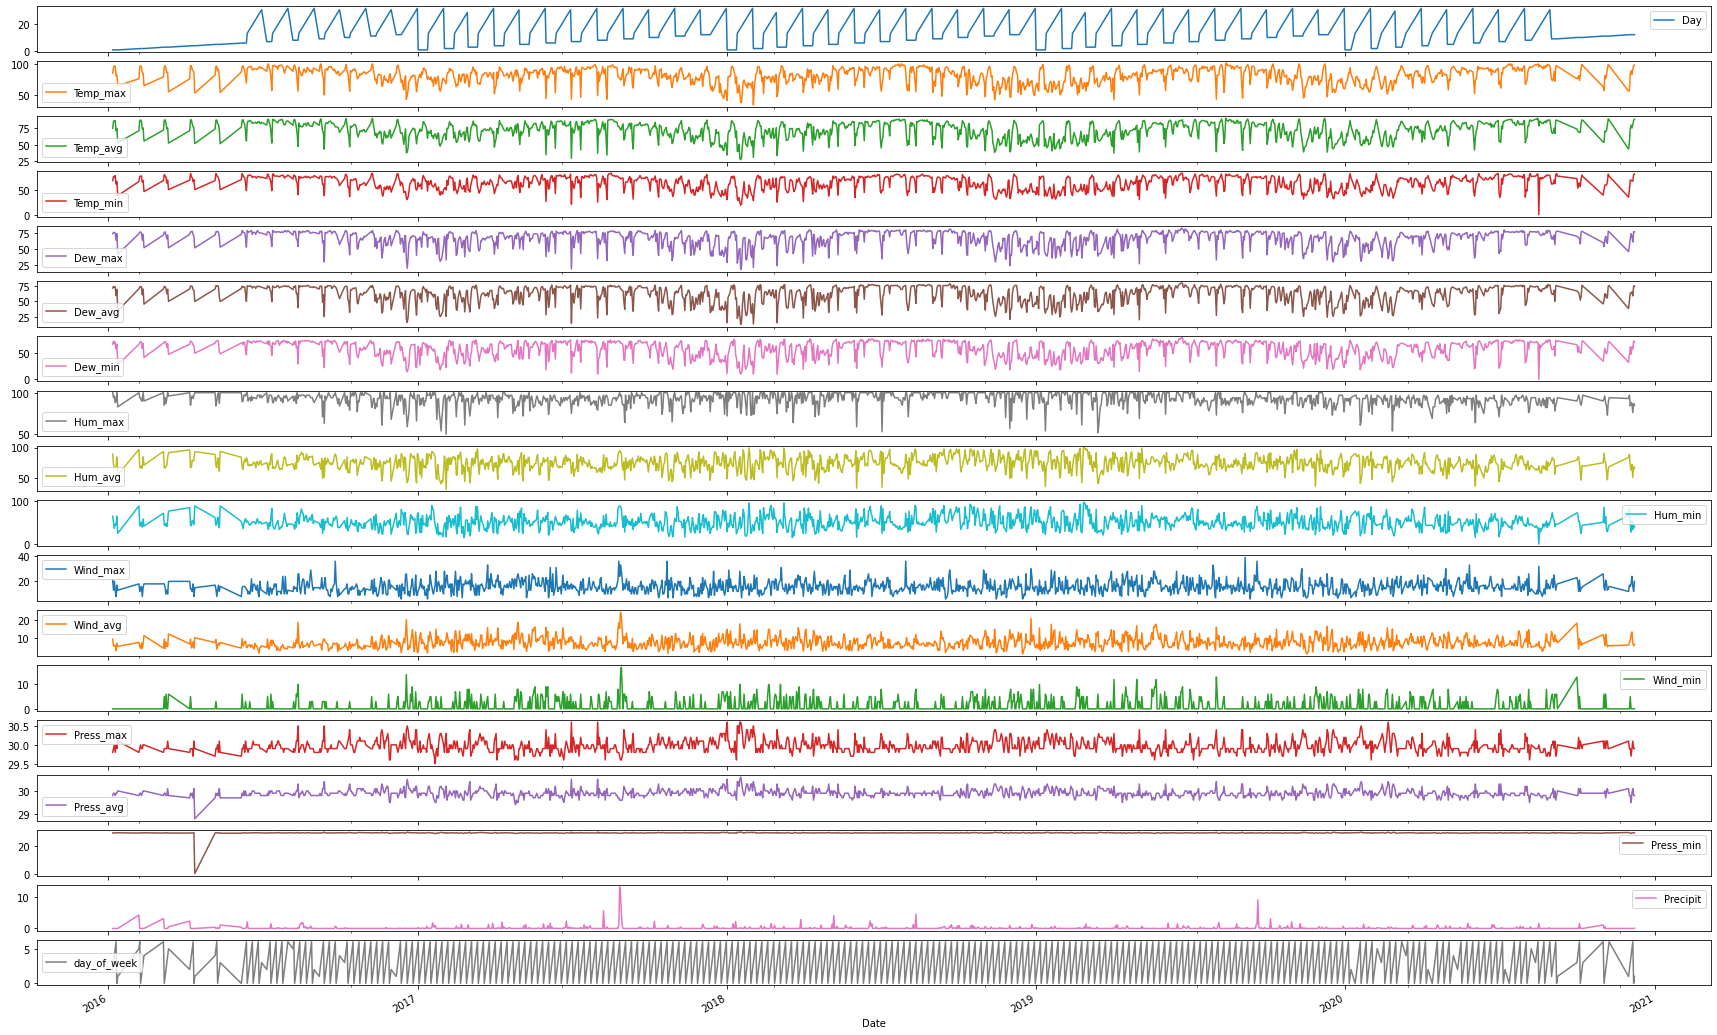

In [ ]:
df.plot(subplots=True,figsize=(30,20))

# Resampling

In [ ]:
#Monthwise
df_month=df.resample("M").mean()
df_month.head()

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
Date,,,,,,,,,,,,,,,,,,
2016-01-31,1.0,85.714286,75.871429,66.000000,68.714286,65.114286,60.714286,93.000000,71.957143,47.714286,15.000000,6.257143,0.000000,29.928571,29.885714,29.828571,0.001429,3.0
2016-02-29,2.0,85.571429,76.342857,67.857143,70.142857,66.742857,63.142857,94.000000,74.600000,52.428571,14.571429,6.928571,0.000000,29.928571,29.900000,29.828571,0.625714,3.0
2016-03-31,3.0,84.285714,75.785714,68.857143,69.571429,67.257143,64.428571,93.571429,77.357143,54.285714,14.857143,7.185714,2.428571,29.914286,29.871429,29.785714,0.531429,3.0
2016-04-30,4.0,84.142857,76.000000,69.571429,71.428571,68.628571,64.857143,95.000000,80.028571,59.285714,14.428571,7.128571,0.714286,29.885714,29.700000,25.542857,0.338571,3.0
2016-05-31,5.0,84.000000,76.314286,70.571429,71.714286,68.028571,65.000000,94.000000,77.685714,57.000000,13.857143,6.914286,0.428571,29.885714,29.842857,29.800000,0.254286,3.0


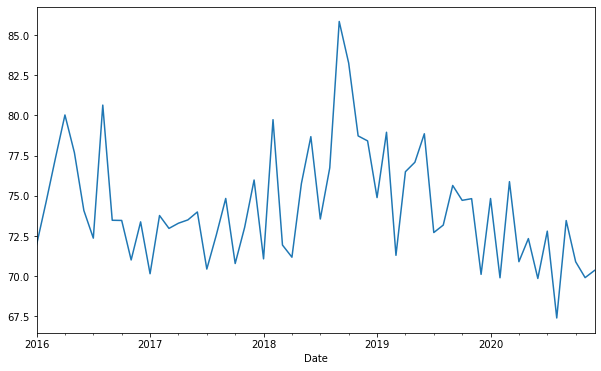

In [ ]:
df_month['Hum_avg'].plot(figsize=(10, 6))

<BarContainer object of 60 artists>

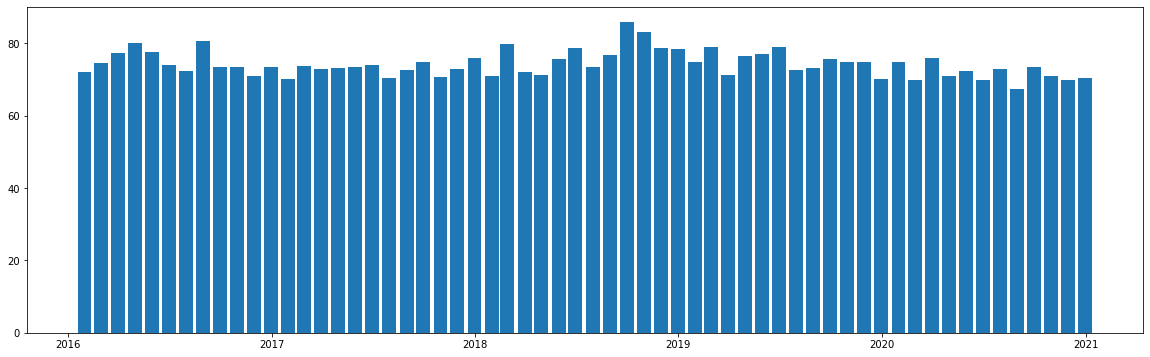

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(df_month['1988':].index, df_month.loc['1988':, "Hum_avg"], width=25, align='center')

In [ ]:
#Yearwise
df_year= df.resample("Y").mean()
df_year.head()

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
Date,,,,,,,,,,,,,,,,,,
2016-12-31,15.789720,85.299065,75.697196,67.649533,70.009346,66.101402,61.457944,92.817757,74.450000,50.313084,14.724299,6.589720,0.803738,29.978037,29.918224,29.717290,0.144393,2.981308
2017-12-31,15.720548,81.150685,71.566849,63.079452,65.761644,61.373973,56.112329,91.638356,72.929863,49.676712,16.213699,8.041096,1.482192,29.963014,29.894795,29.823836,0.219041,3.008219
2018-12-31,15.720548,79.367123,70.148493,61.912329,66.235616,61.576712,56.430137,95.235616,77.038082,54.142466,15.739726,7.726027,1.487671,29.993699,29.923562,29.849589,0.152959,2.991781
2019-12-31,15.720548,80.049315,70.324110,61.816438,65.805479,60.979178,55.484932,92.734247,74.848767,51.673973,16.076712,7.940000,1.457534,29.973151,29.896164,29.825479,0.140082,2.994521
2020-12-31,15.695473,82.703704,73.111111,64.358025,66.695473,62.439095,57.152263,89.477366,71.709053,49.168724,16.152263,7.989300,1.423868,29.957613,29.884362,29.809053,0.112099,3.000000


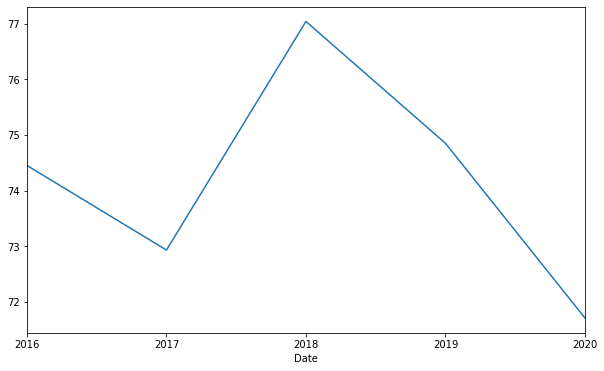

In [ ]:
df_year['Hum_avg'].plot(figsize=(10, 6))

<BarContainer object of 5 artists>

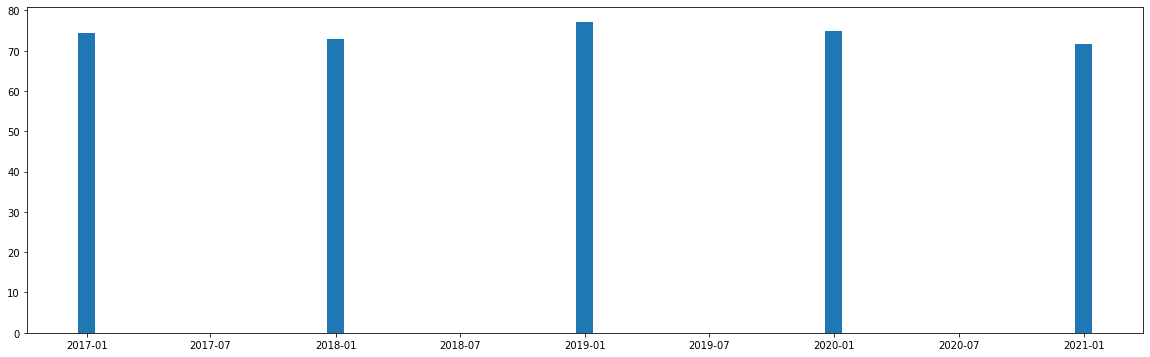

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(df_year['2016':].index, df_year.loc['2016':, "Hum_avg"], width=25, align='center')

In [ ]:
df.shape,df_month.shape,df_year.shape

((1552, 18), (60, 18), (5, 18))

# Decomposition
Decomposition will show the observations and these three elements in the same plot:

Trend: Consistent upward or downward slope of a time series.

Seasonality: Clear periodic pattern of a time series.

Noise: Outliers or missing values



# Additive and Multiplicative decomposition

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


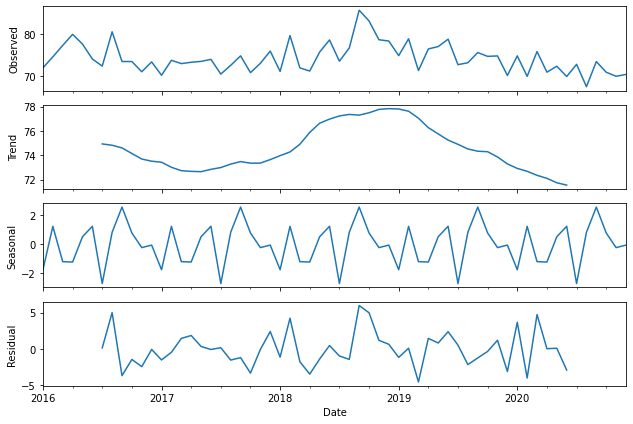

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 9,6

#Additive Decomposition
additive_decomposition = sm.tsa.seasonal_decompose(df_month['Hum_avg'], model='Additive')
fig = additive_decomposition.plot()


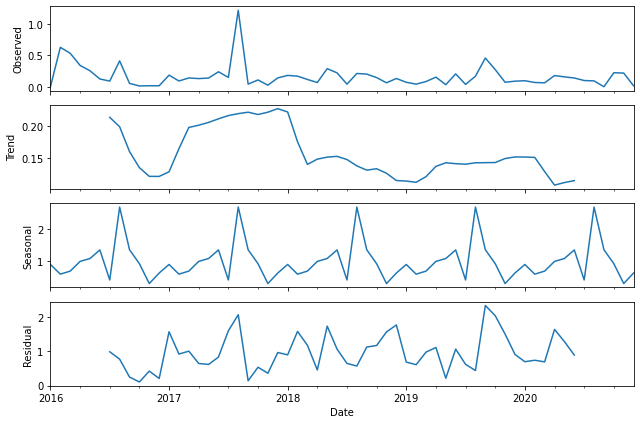

In [ ]:
#Multiplicative Decompose
multiplicative_decomposition = sm.tsa.seasonal_decompose(df_month['Precipit'], model='multiplicative')
fig = multiplicative_decomposition.plot()

# Rolling

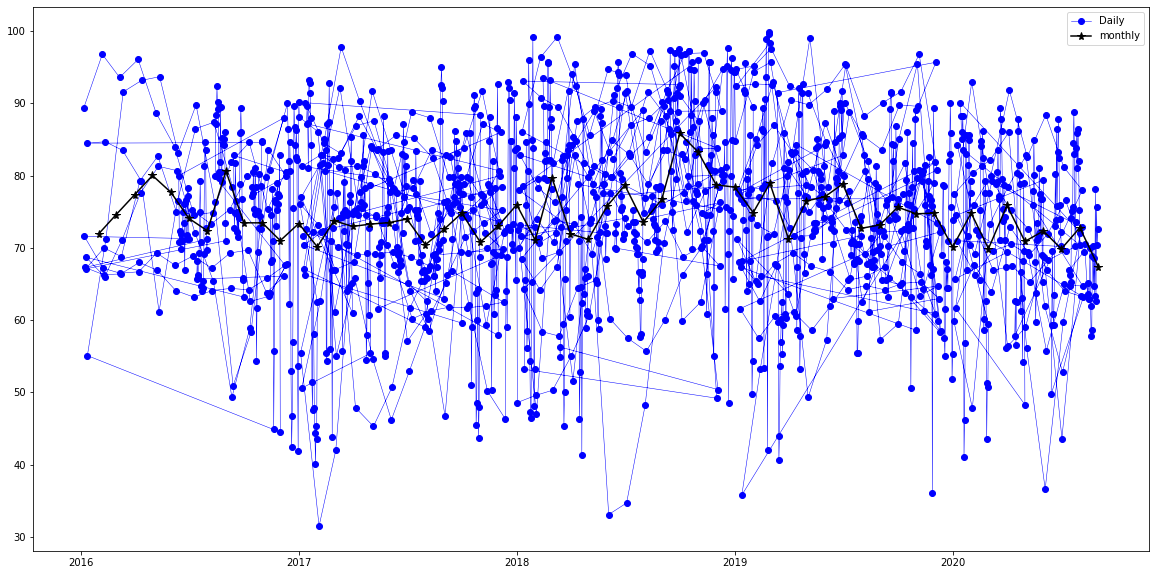

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.plot(df.loc['2016-01':'2020-08', 'Hum_avg'], marker='o', linestyle='-', linewidth = 0.5, label='Daily', color='blue')
plt.plot(df_month.loc['2016-01':'2020-08', 'Hum_avg'], marker='*', markersize=8, linestyle='-', label='monthly', color='black')
plt.legend()

In [ ]:
roll_10=df.rolling(7, center=True).mean()

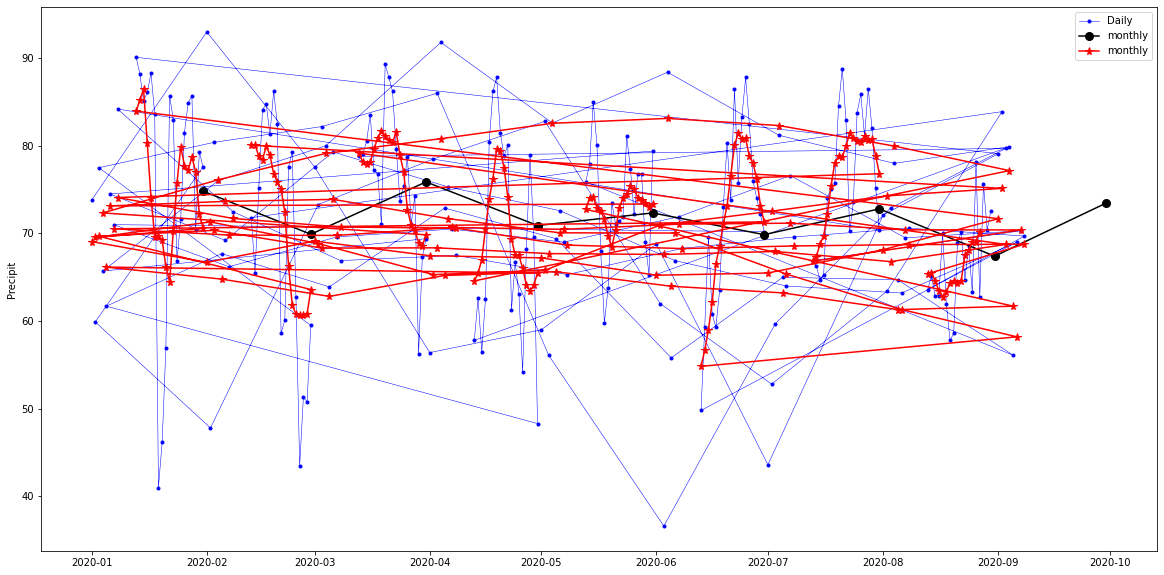

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.plot(df.loc['2020-01':'2020-09', 'Hum_avg'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='blue')
plt.plot(df_month.loc['2020-01':'2020-09', 'Hum_avg'], marker='o', markersize=8, linestyle='-', label='monthly', color='black')
plt.plot(roll_10.loc['2020-01':'2020-09', 'Hum_avg'], marker='*', markersize=8, linestyle='-', label='monthly', color='red')
plt.ylabel("Precipit")
plt.legend()

# Stationary and Non-Stationary Time series


# Stationarity:

‘Stationarity’ is one of the most important concepts you will come across when working with time series data. A stationary series is one in which the properties – mean, variance and covariance, do not vary with time.

###  Agumented Dickey-Fuller(ADF) Test

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["Hum_avg"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.818808
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


In [ ]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(df["Hum_avg"])
pval=res[1]
if pval>0.05:
     print("Non Stationary")
else:
     print("stationary")

stationary


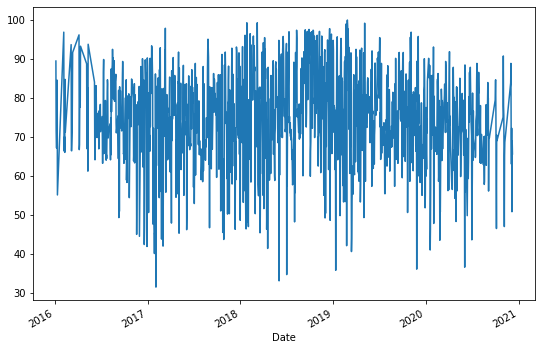

In [ ]:
df["Hum_avg"].plot()

# ACF & PACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
df_dif2=df_month["Hum_avg"].diff().diff()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


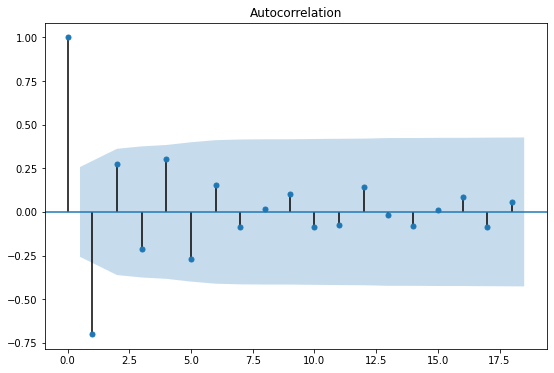

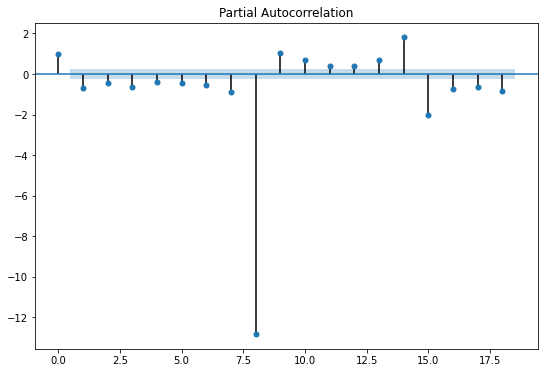

In [ ]:
fig=plot_acf(df_dif2.dropna())
fig1=plot_pacf(df_dif2.dropna())


# ARIMA

ARIMA is an acronym for “autoregressive integrated moving average.” It's a model used in statistics and econometrics to measure events that happen over a period of time. The model is used to understand past data or predict future data in a series.pip install pmdarima

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 3.0MB/s 
     |████████████████████████████████| 9.5MB 19.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima import auto_arima

In [ ]:
auto_model=auto_arima(df["Hum_avg"],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11214.529, Time=1.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11656.623, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11658.417, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11657.980, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11654.625, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11216.897, Time=1.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11223.485, Time=1.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11210.422, Time=3.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11209.771, Time=1.73 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11413.392, Time=0.55 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=11209.516, Time=2.57 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=11390.770, Time=0.78 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=11211.205, Time=3.77 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=11210.659, Time=3.78 sec
 ARIMA(5,1,0)(0,0,0

In [ ]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1552
Model:               SARIMAX(4, 1, 1)   Log Likelihood               -5597.856
Date:                Sat, 29 May 2021   AIC                          11207.713
Time:                        19:13:01   BIC                          11239.793
Sample:                             0   HQIC                         11219.644
                               - 1552                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7512      0.023     32.680      0.000       0.706       0.796
ar.L2         -0.3107      0.028    -11.148      0.000      -0.365      -0.256
ar.L3          0.0744      0.028      2.612      0.009       0.019       0.130
ar.L4          0.0387      0.022      1.770      0.077      -0.004       0.081
ma.L1         -0.9878      0.005   -212.884      0.000      -0.997      -0.979
sigma2        79.7396      2.256     35.345      0.000      75.318      84.161
===================================================================================
Ljung-Box (Q):                       37.13   Jarque-Bera (JB):               269.00
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.61
Prob(H) (two-sided):                  0.75   Kurtosis:                         4.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
X=df_month["Hum_avg"].dropna()

In [ ]:
len(X)

60

In [ ]:
train_len=int(0.8*len(X))

In [ ]:
train=X[:train_len]
len(train)

48

In [ ]:
test=X[train_len:]
len(test)

12

# ARIMA Model

In [ ]:

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(4,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  sigma2 = ssr/nobs, where ssr is the sum of squared residuals. If


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Hum_avg   No. Observations:                   47
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -123.203
Method:                       css-mle   S.D. of innovations              3.252
Date:                Sat, 29 May 2021   AIC                            260.407
Time:                        19:13:01   BIC                            273.358
Sample:                    02-29-2016   HQIC                           265.280
                         - 12-31-2019                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0477      0.214     -0.222      0.825      -0.468       0.372
ar.L1.D.Hum_avg    -1.5549   9.64e-05  -1.61e+04      0.000      -1.555      -1.555
ar.L2.D.Hum_avg    -1.0496      0.000  -4296.225      0.000      -1.050      -1.049
ar.L3.D.Hum_avg    -0.7032      0.000  -2282.303      0.000      -0.704      -0.703
ar.L4.D.Hum_avg    -0.2085      0.000   -983.688      0.000      -0.209      -0.208
ma.L1.D.Hum_avg     0.9972        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1033           -1.4844j            1.4880           -0.2611
AR.2           -0.1033           +1.4844j            1.4880            0.2611
AR.3           -1.0000           -0.0000j            1.0000           -0.5000
AR.4           -2.1661           -0.0000j            2.1661           -0.5000
MA.1           -1.0028           +0.0000j            1.0028            0.5000
-----------------------------------------------------------------------------
"""

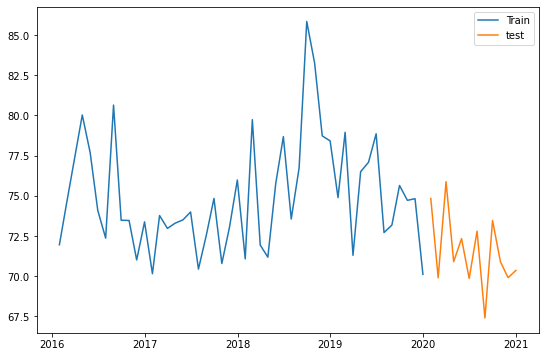

In [ ]:
plt.plot(train,label="Train")
plt.plot(test,label="test")
plt.legend()

In [ ]:
ypred_train=model_fit.predict()
ypred_train

Date
2016-02-29   -0.047664
2016-03-31   -1.161062
2016-04-30   -2.447074
2016-05-31   -3.943828
2016-06-30   -0.372805
2016-07-31    2.362895
2016-08-31    3.484307
2016-09-30   -3.735949
2016-10-31    0.951724
2016-11-30    0.946109
2016-12-31    3.688179
2017-01-31   -1.077461
2017-02-28    1.990110
2017-03-31   -2.049902
2017-04-30    0.203444
2017-05-31   -1.634764
2017-06-30    0.706119
2017-07-31   -1.464164
2017-08-31    2.561688
2017-09-30   -0.594727
2017-10-31   -0.800023
2017-11-30   -0.205908
2017-12-31    0.870182
2018-01-31   -2.772179
2018-02-28    1.510765
2018-03-31   -4.121128
2018-04-30    2.081957
2018-05-31    1.317326
2018-06-30    0.313953
2018-07-31   -4.862827
2018-08-31    1.370905
2018-09-30   -1.027121
2018-10-31   -4.824722
2018-11-30   -4.729511
2018-12-31    2.675664
2019-01-31    2.022391
2019-02-28    3.887689
2019-03-31   -1.498102
2019-04-30    3.935735
2019-05-31   -1.150686
2019-06-30   -0.348137
2019-07-31   -3.569193
2019-08-31    3.454380
2019-0

In [ ]:
ypred_test=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [ ]:
print(ypred_test,test)

2020-01-31    1.653071
2020-02-29    2.274754
2020-03-31   -2.199068
2020-04-30    0.635440
2020-05-31   -0.839324
2020-06-30    1.494919
2020-07-31   -1.647086
2020-08-31    1.234409
2020-09-30   -1.282030
2020-10-31    1.329033
2020-11-30   -1.460737
2020-12-31    1.305198
Freq: M, dtype: float64 Date
2020-01-31    74.833333
2020-02-29    69.904000
2020-03-31    75.881481
2020-04-30    70.903846
2020-05-31    72.340741
2020-06-30    69.861538
2020-07-31    72.803704
2020-08-31    67.403846
2020-09-30    73.462500
2020-10-31    70.900000
2020-11-30    69.912500
2020-12-31    70.362500
Freq: M, Name: Hum_avg, dtype: float64


In [ ]:
date_test=pd.date_range(start="2020-01-31  ",end="2020-12-31")
date_test

DatetimeIndex(['2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=336, freq='D')

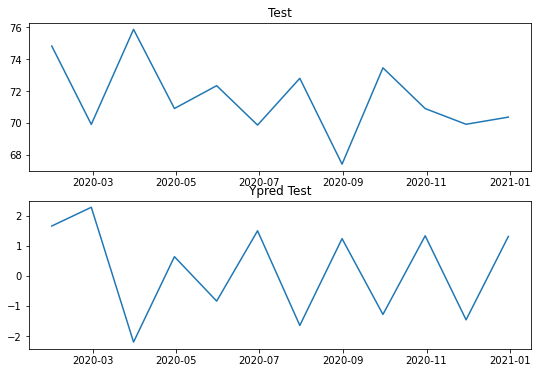

In [ ]:
fix , axs = plt.subplots(2)

axs[0].set_title("Test")
axs[0].plot(test)

axs[1].set_title("Ypred Test")
axs[1].plot(ypred_test)

plt.show()

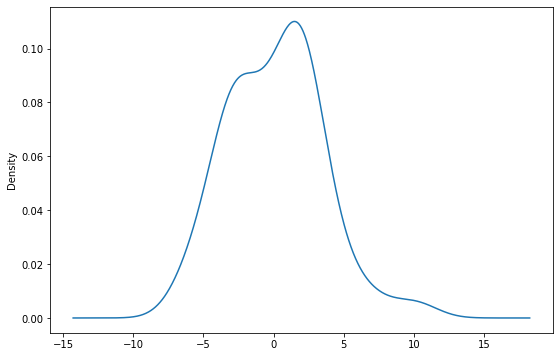

In [ ]:
residuals=model_fit.resid
residuals.plot(kind='kde')

# MSE and RMSE
The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. ... The MSE has the units squared of whatever is plotted on the vertical axis. Another quantity that we calculate is the Root Mean Squared Error (RMSE). It is just the square root of the mean square error.

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test,ypred_test)
print("MSE is :",mse)
print("RMSE is :",np.sqrt(mse))
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test,ypred_test)
print("MSE is :",mse)
print("RMSE is :",np.sqrt(mse))

MSE is : 5100.31932395376
RMSE is : 71.41651996529767


# Forecasting

In [ ]:
#Predict future value for 12 months
model=ARIMA(X,order=(4,1,1))
model_fit=model.fit()

In [ ]:
forecast=model_fit.predict(start=len(X),end=len(X)+11)
forecast

2021-01-31    1.148680
2021-02-28   -1.167461
2021-03-31    0.083051
2021-04-30   -0.075426
2021-05-31    0.270415
2021-06-30   -0.425771
2021-07-31    0.069436
2021-08-31   -0.126732
2021-09-30    0.042536
2021-10-31   -0.188740
2021-11-30    0.000023
2021-12-31   -0.107147
Freq: M, dtype: float64

In [ ]:
forecast_date=pd.date_range(start="2021-01-31",end="2021-12-31")
len(forecast_date),len(forecast)

(335, 12)

In [ ]:
forecast.index=forecast

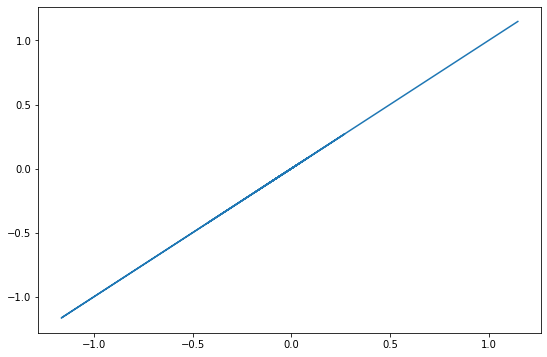

In [ ]:
forecast.plot()

# Conclusion

Time series allows you to analyze major patterns such as trends, seasonality, cyclicity, and irregularity. Time series analysis is used for various applications such as stock market analysis, pattern recognition, earthquake prediction, economic forecasting, census analysis and so on.


The purpose of this study is as follows:

1. Using time series to predict Weather condition

2. Comparing the root-mean-square value of each model using time series predictive modeling through several methods.

3. Finding a method suitable for prediction on the Weather dataset

4. Using ARIMA model for future forecasting of Weather and many more

This Data will support the government and experts in making arrangements for what is about to happen. Based on the findings of instantaneous model, these models can be adjusted to guide long time.

Thank you